I a little bit of trouble installing altair, there's more than just `pip install altair`

`pip install -U altair vega_datasets notebook vega3`

https://vega.github.io/vega/

In [4]:
import altair as alt
from vega_datasets import data
import pandas as pd

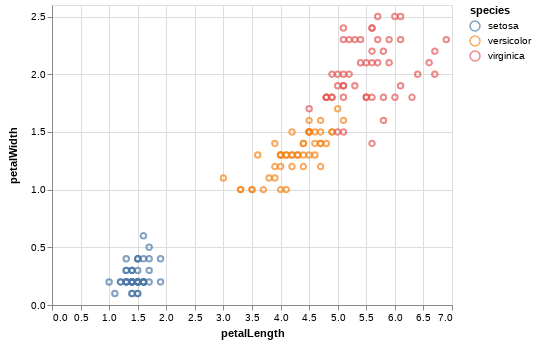

In [3]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [28]:
cars = alt.load_dataset('cars')
alt.Chart(cars).mark_point()

In [29]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


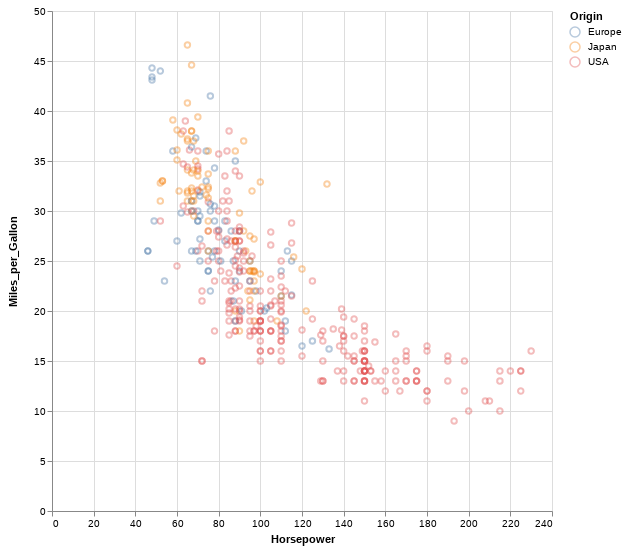

In [40]:
alt.Chart(
    cars,
    width=500,
    height=500).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
)

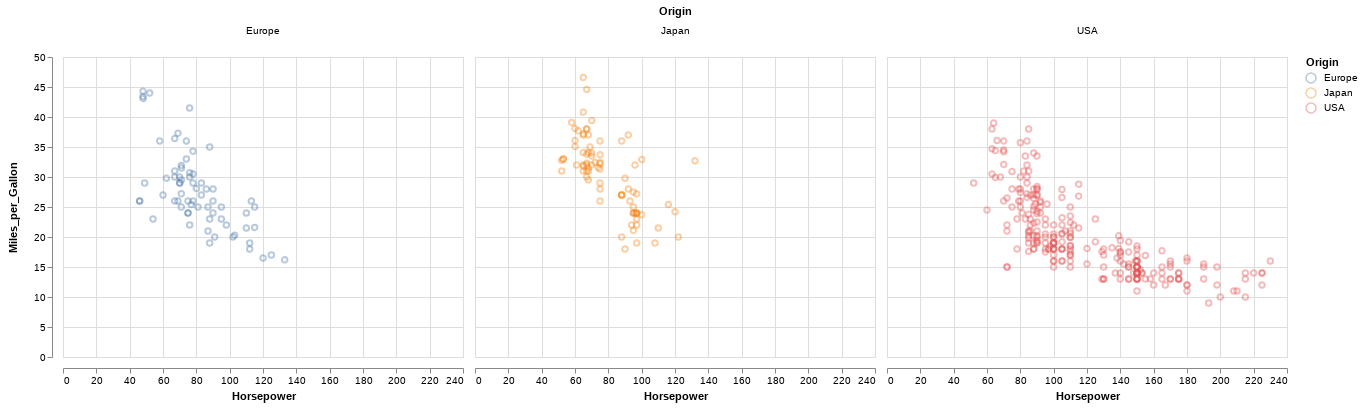

In [43]:
alt.Chart(
    cars
).mark_point(opacity=.4).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).facet(
    column='Origin'
).interactive()

In [7]:
df = pd.read_csv('./2017-fordgobike-tripdata.csv')

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [26]:
df.groupby(['start_station_id', 'end_station_id']) \
    .agg('size') \
    .reset_index() \
    .groupby(['start_station_id'])[0] \
    .agg('sum').reset_index()

,start_station_id,0
0,3,10142
1,4,2528
2,5,7987
3,6,13664
4,7,2935
5,8,4269
6,9,4185
7,10,2310
8,11,3474
9,13,3393


In [16]:
df.groupby(['start_station_id']) \
    .agg('size') \
    .reset_index() \
    .rename(columns={0: 'trips'})

,start_station_id,trips
0,3,10142
1,4,2528
2,5,7987
3,6,13664
4,7,2935
5,8,4269
6,9,4185
7,10,2310
8,11,3474
9,13,3393
